In [82]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [83]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Replace multiple whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)
    # Replace line breaks with a space
    text = text.replace('\\n', ' ')
    text = text.replace('\n', ' ')

    # Replace dashes with spaces
    text = text.replace('-', ' ')

    # Remove special characters, punctuation (except apostrophes), and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    # stop_words = set(stopwords.words('english'))
    # tokens = [token for token in tokens if token not in stop_words]
    
    # Porter stemming (optional)
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [ ]:
file_train = 'data/subtask1/train.json'
file_validation = 'data/subtask1/validation.json'

# Open the JSON file
with open(file_train, 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Create a list of dictionaries
entries_list = []

# Iterate through each entry in the JSON data
for entry in data:
    # Extract relevant information from each entry
    entry_dict = {
        "id": entry["id"],
        "text": entry["text"],
        "labels": entry["labels"],
        "link": entry["link"]
    }

    # Append the dictionary to the list
    entries_list.append(entry_dict)

# Now 'entries_list' contains a list of dictionaries, each representing an entry in your JSON file
# You can access the information as needed
for entry_dict in entries_list:
    print(f"ID: {entry_dict['id']}, Text: {entry_dict['text']}, Labels: {entry_dict['labels']}, Link: {entry_dict['link']}")

In [ ]:
# Create a new list to store the preprocessed dictionaries
preprocessed_list = []

for entry in entries_list:
    preprocessed_entry = entry.copy()
    preprocessed_entry['text'] = preprocess_text(entry['text'])
    if len(preprocessed_entry['labels']) == 0:
        preprocessed_entry['labels'] = ['nocat']
    else:
        t = preprocessed_entry.get('labels',[0])[0]
        # print(f'aos {t}')
        preprocessed_entry['labels'] = [t]
        # preprocessed_entry['labels'] = preprocessed_entry['labels']    
    preprocessed_list.append(preprocessed_entry)


# Display the preprocessed data
for id,entry in enumerate(preprocessed_list):
    print(f"ID: {entry['id']}, Text: {entry['text']} Label: {entry['labels']}")
    # print(f"ID: {entries_list[id]['id']}, Text: {entries_list[id]['text']}")

In [ ]:

# Initialize a dictionary to store label counts per category
category_counts = {}
ids_ohne_label = []
ids_mit_label = []
max_id = 0

# Loop through the dataset
for entry in preprocessed_list:
    labels = entry.get('labels', [])  # Get the labels for the current entry

    if not labels:
        ids_ohne_label.append(entry['id'])
    else:
        ids_mit_label.append(entry['id'])
        for label in labels:
            if label not in category_counts:
                category_counts[label] = 1
            else:
                category_counts[label] += 1
    if len(labels) > max_id:
        max_id = len(labels)
        idx = entry['id']


# Display the label counts per category
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")

f_list = [d for d in preprocessed_list if d.get('id') == idx]

print(f'ids ohne labels: {len(ids_ohne_label)} ids mit labels: {len(ids_mit_label)} max_labels {max_id}')
print(f'id {idx} text: {f_list}')

In [142]:
labels = [label for d in preprocessed_list for label in d.get("labels", [])]
quotes = [d["text"] for d in preprocessed_list]


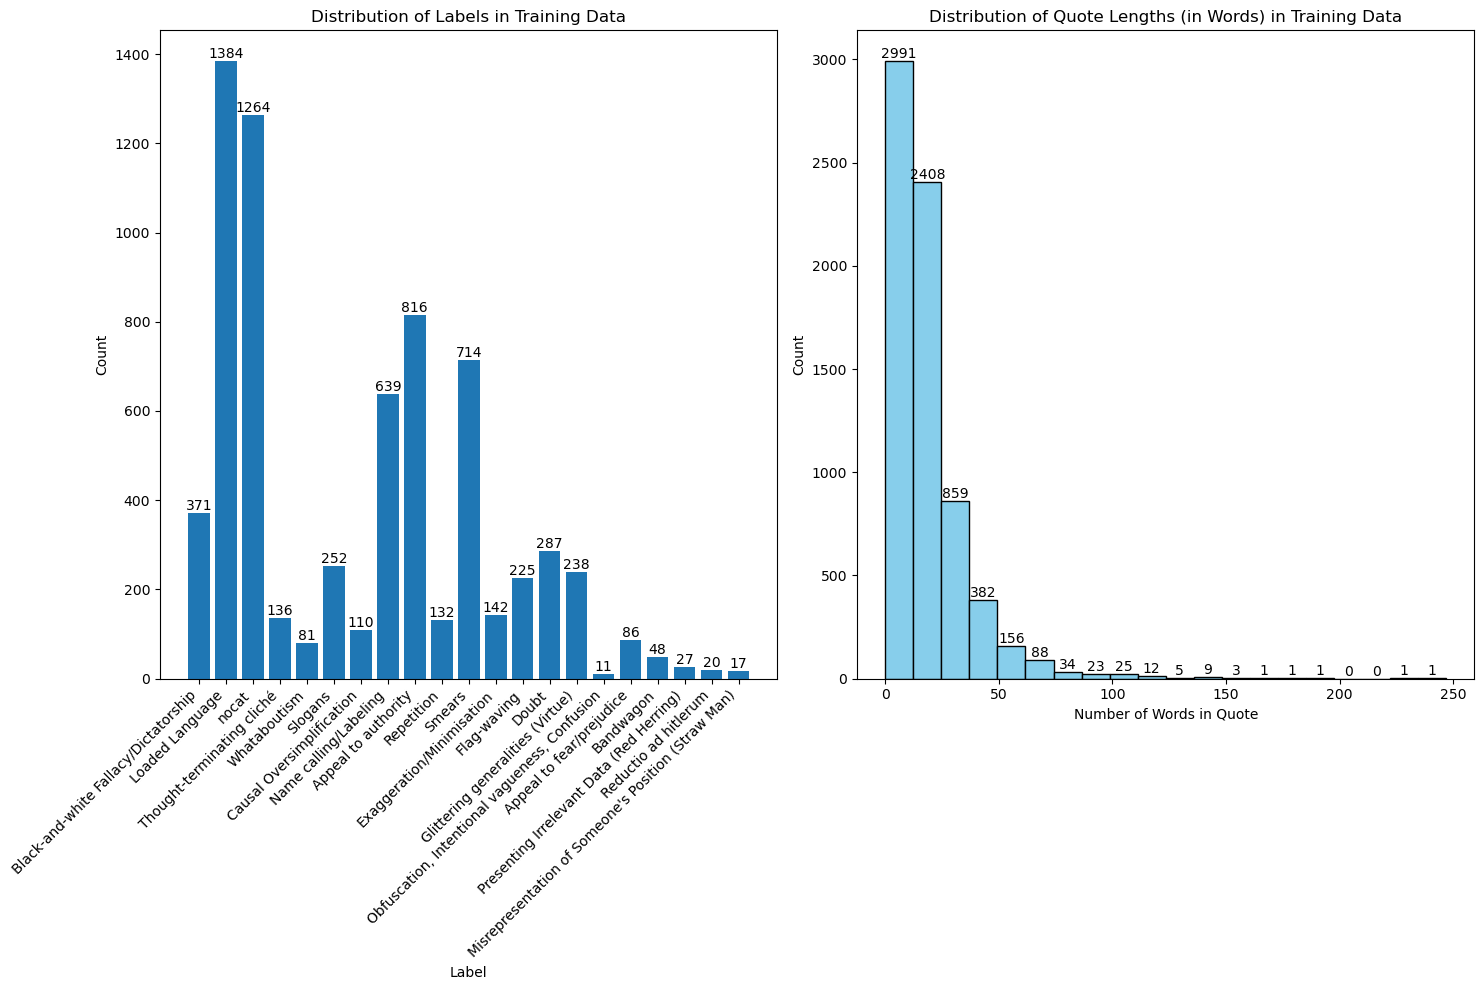

In [143]:
# Plotting the distribution of labels
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
label_counts = Counter(labels)
bars = plt.bar(*zip(*label_counts.items()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis text

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Calculating and plotting a histogram of quote lengths in words
quote_word_counts = [len(quote.split()) for quote in quotes]

plt.subplot(1, 2, 2)
counts, bins, _ = plt.hist(quote_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words in Quote')
plt.ylabel('Count')
plt.title('Distribution of Quote Lengths (in Words) in Training Data')

# Add text labels above each bar
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.tight_layout()

plt.show()

In [144]:
# Specific label to remove
label_to_remove = "nocat"

# Remove the label from the data
labels = [label for label in labels if label != label_to_remove]
label_counts = Counter(labels)

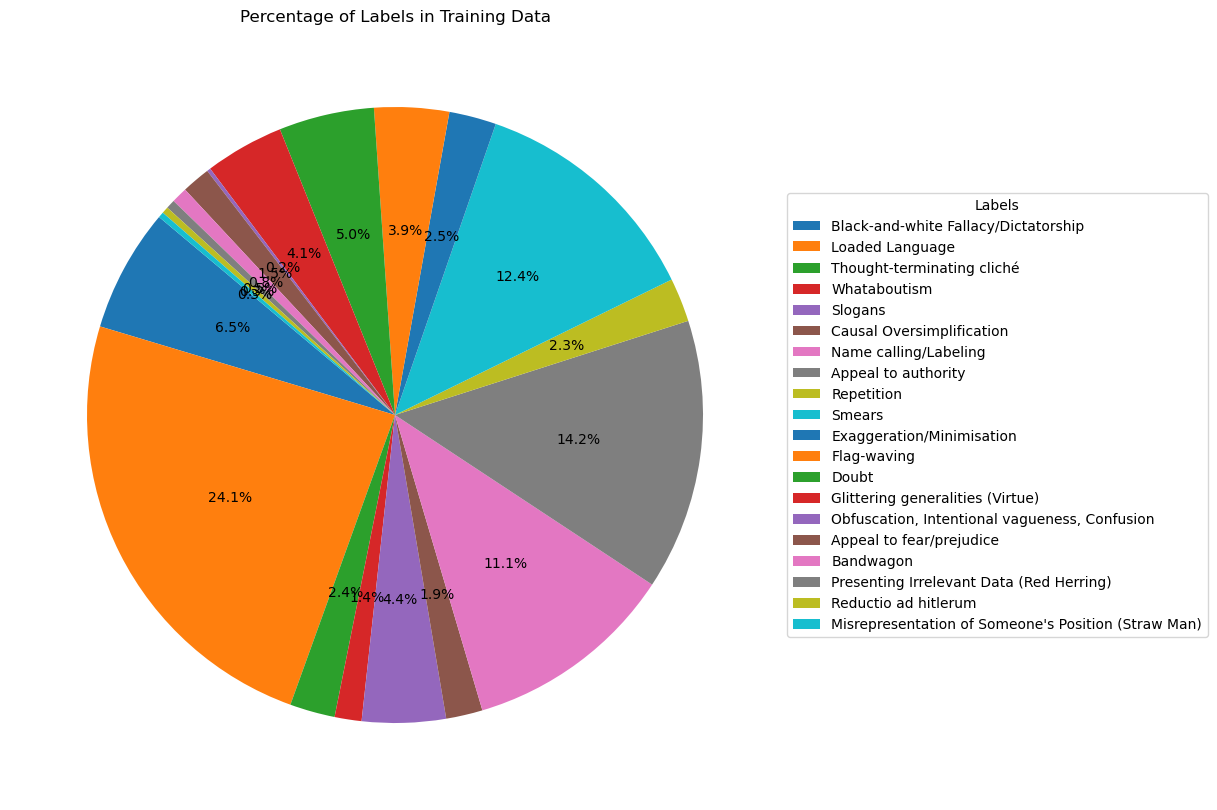

In [145]:
plt.figure(figsize=(15, 10))

# Plotting the percentage distribution of labels with legend
pie = plt.pie(label_counts.values(), labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Labels in Training Data')

# Add legend
plt.legend(label_counts.keys(), title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))


For Validation Data

In [ ]:
file_train = 'data/subtask1/train.json'
file_validation = 'data/subtask1/validation.json'

# Open the JSON file
with open(file_validation, 'r') as file_val:
    # Load the JSON data
    data = json.load(file_val)

# Create a list of dictionaries
entries_list = []

# Iterate through each entry in the JSON data
for entry in data:
    # Extract relevant information from each entry
    entry_dict = {
        "id": entry["id"],
        "text": entry["text"],
        "labels": entry["labels"],
        "link": entry["link"]
    }

    # Append the dictionary to the list
    entries_list.append(entry_dict)

# Now 'entries_list' contains a list of dictionaries, each representing an entry in your JSON file
# You can access the information as needed
for entry_dict in entries_list:
    print(f"ID: {entry_dict['id']}, Text: {entry_dict['text']}, Labels: {entry_dict['labels']}, Link: {entry_dict['link']}")

In [ ]:
# Create a new list to store the preprocessed dictionaries
preprocessed_list = []

for entry in entries_list:
    preprocessed_entry = entry.copy()
    preprocessed_entry['text'] = preprocess_text(entry['text'])
    if len(preprocessed_entry['labels']) == 0:
        preprocessed_entry['labels'] = ['nocat']
    else:
        t = preprocessed_entry.get('labels',[0])[0]
        # print(f'aos {t}')
        preprocessed_entry['labels'] = [t]
        # preprocessed_entry['labels'] = preprocessed_entry['labels']    
    preprocessed_list.append(preprocessed_entry)


# Display the preprocessed data
for id,entry in enumerate(preprocessed_list):
    print(f"ID: {entry['id']}, Text: {entry['text']} Label: {entry['labels']}")
    # print(f"ID: {entries_list[id]['id']}, Text: {entries_list[id]['text']}")

In [ ]:

# Initialize a dictionary to store label counts per category
category_counts = {}
ids_ohne_label = []
ids_mit_label = []
max_id = 0

# Loop through the dataset
for entry in preprocessed_list:
    labels = entry.get('labels', [])  # Get the labels for the current entry

    if not labels:
        ids_ohne_label.append(entry['id'])
    else:
        ids_mit_label.append(entry['id'])
        for label in labels:
            if label not in category_counts:
                category_counts[label] = 1
            else:
                category_counts[label] += 1
    if len(labels) > max_id:
        max_id = len(labels)
        idx = entry['id']


# Display the label counts per category
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")

f_list = [d for d in preprocessed_list if d.get('id') == idx]

print(f'ids ohne labels: {len(ids_ohne_label)} ids mit labels: {len(ids_mit_label)} max_labels {max_id}')
print(f'id {idx} text: {f_list}')

In [151]:
labels_val = [label for d in preprocessed_list for label in d.get("labels", [])]
quotes_val = [d["text"] for d in preprocessed_list]

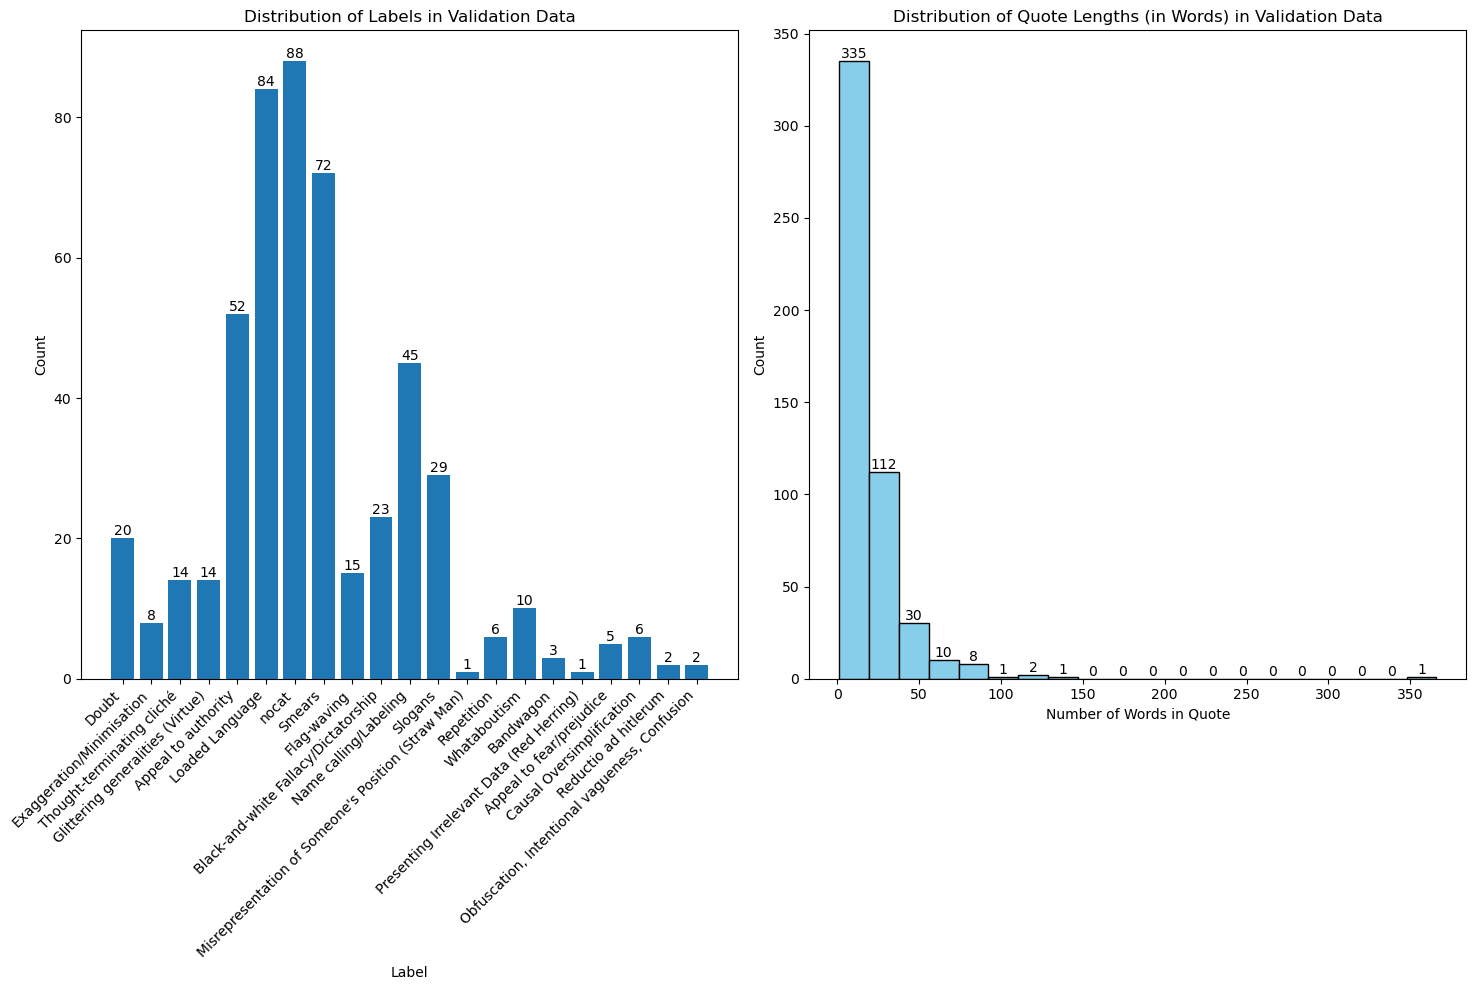

In [152]:
# Plotting the distribution of labels
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
label_counts = Counter(labels_val)
bars = plt.bar(*zip(*label_counts.items()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Validation Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis text

# Add text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Calculating and plotting a histogram of quote lengths in words
quote_word_counts = [len(quote.split()) for quote in quotes_val]

plt.subplot(1, 2, 2)
counts, bins, _ = plt.hist(quote_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words in Quote')
plt.ylabel('Count')
plt.title('Distribution of Quote Lengths (in Words) in Validation Data')

# Add text labels above each bar
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')


plt.tight_layout()

plt.show()

In [155]:
# Specific label to remove
label_to_remove = "nocat"

# Remove the label from the data
labels = [label for label in labels_val if label != label_to_remove]
label_counts = Counter(labels_val)

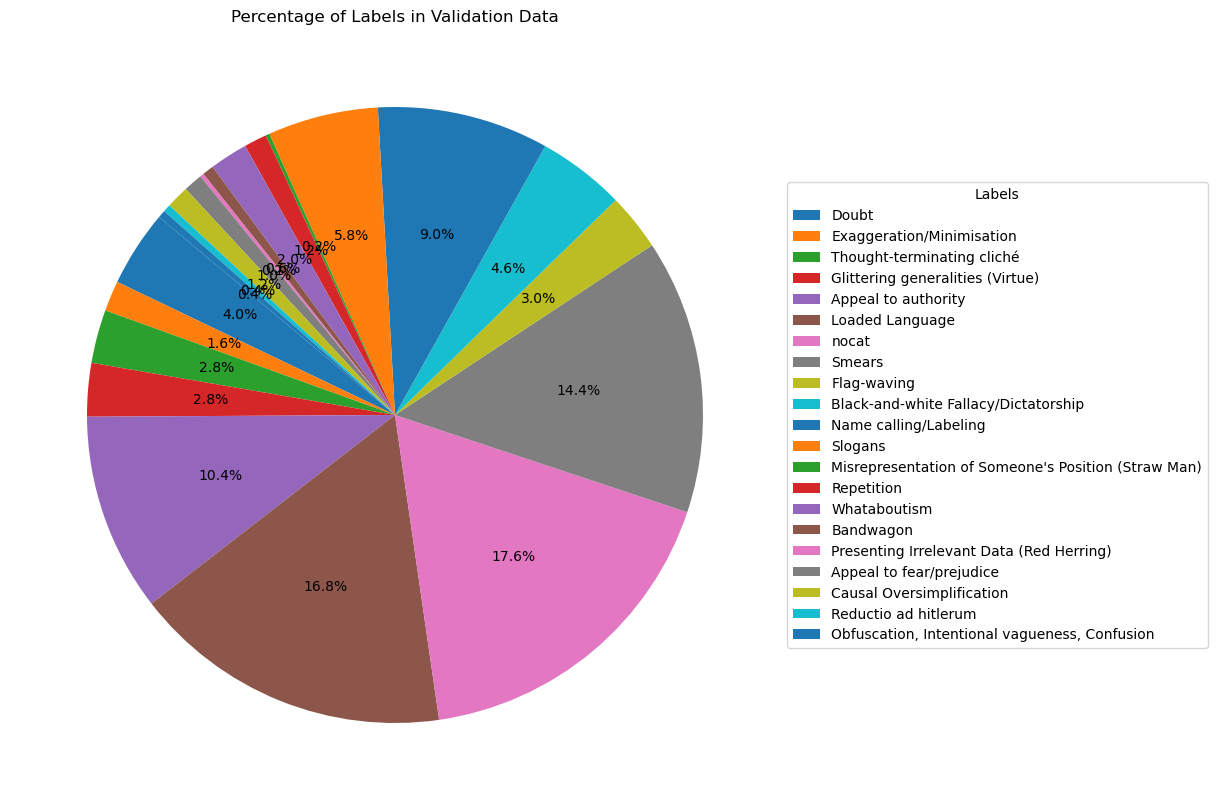

In [156]:
plt.figure(figsize=(15, 10))

# Plotting the percentage distribution of labels with legend
pie = plt.pie(label_counts.values(), labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Labels in Validation Data')

# Add legend
plt.legend(label_counts.keys(), title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))
